In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Define the environment (warehouse)
class WarehouseEnvironment:
    def __init__(self, initial_inventory):
        self.inventory = initial_inventory
        self.max_inventory = 100  # Maximum warehouse capacity
        self.demand_mean = 30     # Average product demand
        self.demand_std = 10      # Standard deviation of product demand
        
    def step(self, action):
        # Take action (e.g., order products)
        ordered_quantity = action
        # Simulate demand based on a normal distribution
        demand = np.random.normal(self.demand_mean, self.demand_std)
        # Calculate reward (e.g., storage costs and stockouts)
        if self.inventory + ordered_quantity >= demand:
            reward = 100 - 2 * self.inventory - ordered_quantity
        else:
            reward = -200 - 2 * self.inventory - ordered_quantity
        
        # Update inventory
        self.inventory += ordered_quantity - demand
        self.inventory = max(0, min(self.inventory, self.max_inventory))
        
        return reward, self.inventory

In [3]:
# Q-learning algorithm for the agent
class QLearningAgent:
    def __init__(self, action_space_size, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.alpha = alpha  # learning rate
        self.gamma = gamma  # discount factor
        self.epsilon = epsilon  # exploration-exploitation trade-off
        self.q_table = np.zeros((action_space_size,))
    
    def choose_action(self, state):
        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.choice(len(self.q_table))
        else:
            return np.argmax(self.q_table)
    
    def update_q_table(self, state, action, reward, next_state):
        self.q_table[action] += self.alpha * (reward + self.gamma * np.max(self.q_table) - self.q_table[action])

In [4]:
# Extended simulation for stock management with RL
def simulate_rl_stock_management_extended(env, agent, num_episodes=2000):
    rewards = []
    inventories = []
    for episode in range(num_episodes):
        state = env.inventory
        action = agent.choose_action(state)
        reward, next_state = env.step(action)
        agent.update_q_table(state, action, reward, next_state)
        rewards.append(reward)
        inventories.append(env.inventory)
    return rewards, inventories

In [5]:
# Simulation parameters
initial_inventory = 50
env = WarehouseEnvironment(initial_inventory)
agent = QLearningAgent(action_space_size=100)

In [6]:
# Run extended simulation
rewards, inventories = simulate_rl_stock_management_extended(env, agent, num_episodes=2000)

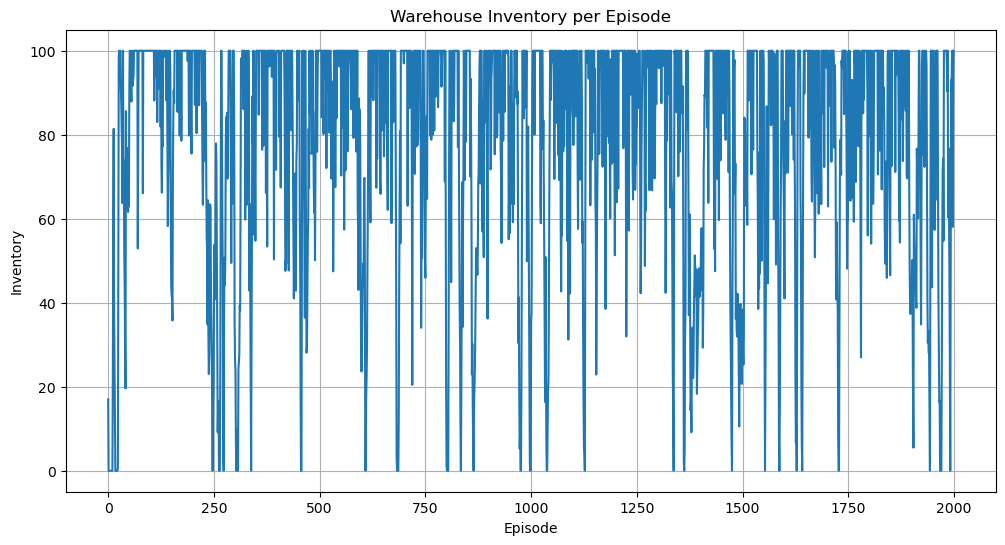

In [7]:
# Plot inventory over time
plt.figure(figsize=(12, 6))
plt.plot(inventories)
plt.title('Warehouse Inventory per Episode')
plt.xlabel('Episode')
plt.ylabel('Inventory')
plt.grid(True)
plt.show()

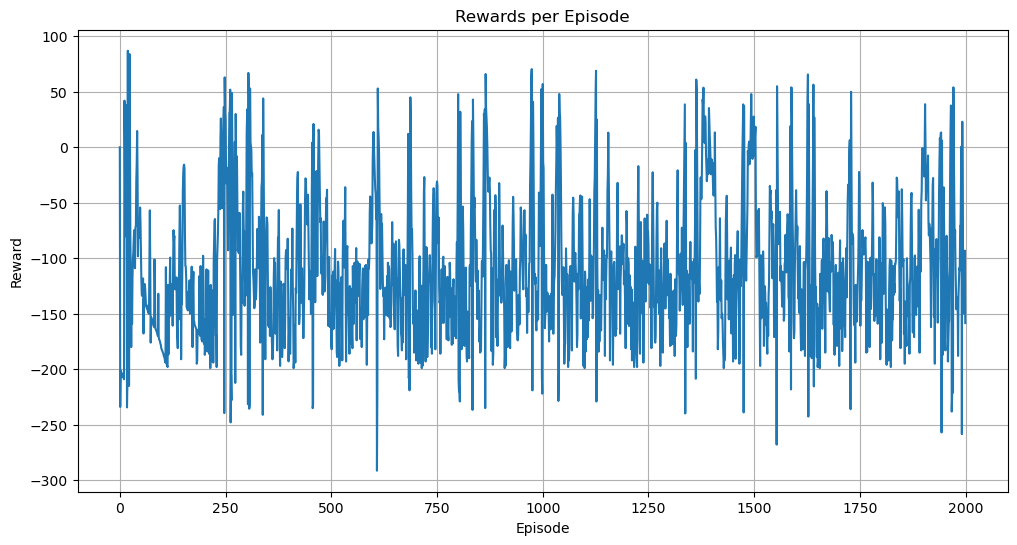

In [8]:
# Plot rewards per episode
plt.figure(figsize=(12, 6))
plt.plot(rewards)
plt.title('Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.grid(True)
plt.show()

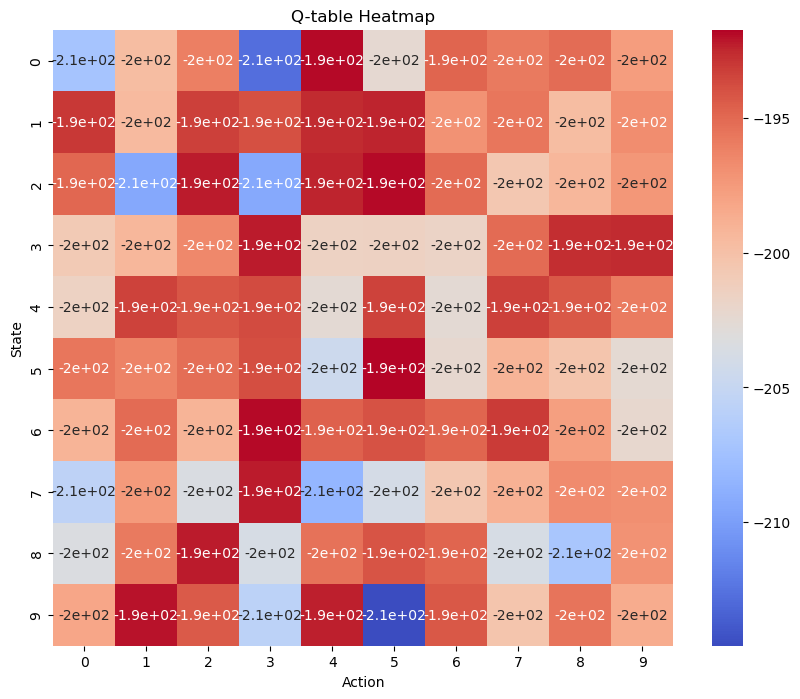

In [9]:
# Heatmap for Q-table
plt.figure(figsize=(10, 8))
sns.heatmap(agent.q_table.reshape((10, 10)), annot=True, cmap='coolwarm', cbar=True)
plt.title('Q-table Heatmap')
plt.xlabel('Action')
plt.ylabel('State')
plt.show()

In [10]:
# Average reward per episode analysis
avg_reward_per_episode = np.mean(rewards)
print(f"Average reward per episode: {avg_reward_per_episode}")

Average reward per episode: -109.53359498677071


In [11]:
# Analysis of the learned policy
best_actions = np.argmax(agent.q_table.reshape((10, 10)), axis=1)
print(f"Best learned policy:")
for state in range(10):
    print(f"State {state}: Action {best_actions[state]}")

Best learned policy:
State 0: Action 4
State 1: Action 5
State 2: Action 5
State 3: Action 3
State 4: Action 7
State 5: Action 5
State 6: Action 3
State 7: Action 3
State 8: Action 2
State 9: Action 1


In [12]:
# Q-table
q_table_df = pd.DataFrame(agent.q_table.reshape((10, 10)), columns=[f'Action {i}' for i in range(10)])
state_indices = [f'State {i}' for i in range(10)]
q_table_df.index = state_indices
print("\nQ-table:")
print(q_table_df)


Q-table:
           Action 0    Action 1    Action 2    Action 3    Action 4  \
State 0 -207.213752 -199.683815 -196.030859 -212.751186 -191.888271   
State 1 -193.042065 -199.568646 -193.256677 -193.947772 -192.567525   
State 2 -194.937301 -209.347960 -192.240541 -209.293432 -192.430335   
State 3 -200.806096 -199.232053 -196.469323 -192.188337 -201.634297   
State 4 -201.590061 -193.389406 -194.138483 -193.736671 -202.545001   
State 5 -195.571509 -196.222802 -195.246900 -193.799078 -204.542410   
State 6 -199.130393 -195.088847 -199.122409 -191.883400 -194.637860   
State 7 -205.597887 -197.460115 -203.439930 -192.190217 -208.335015   
State 8 -203.361618 -195.805491 -192.238187 -203.766043 -195.406536   
State 9 -198.223642 -192.000731 -194.348339 -205.655689 -192.301439   

           Action 5    Action 6    Action 7    Action 8    Action 9  
State 0 -202.412259 -194.822492 -195.820106 -195.136162 -197.640389  
State 1 -192.378730 -197.067159 -195.602397 -199.749800 -196.778887 